### 다변량 자료 시각화?

공간자료 표현 : $\{(x_1, y_1, z_1), \cdots, (x_n, y_n, z_n)\}$

In [1]:
x = 10*(1:87)
y = 10*(1:61)

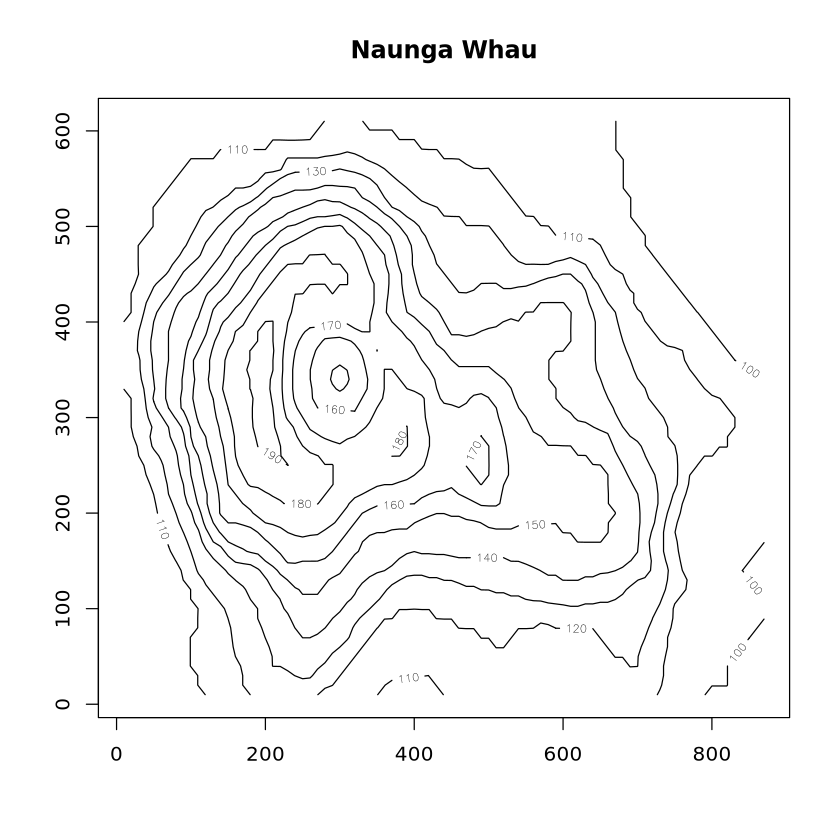

In [5]:
contour(x, y, volcano, main = "Naunga Whau")  ## volcano 자료는 어디서 들어온거냐

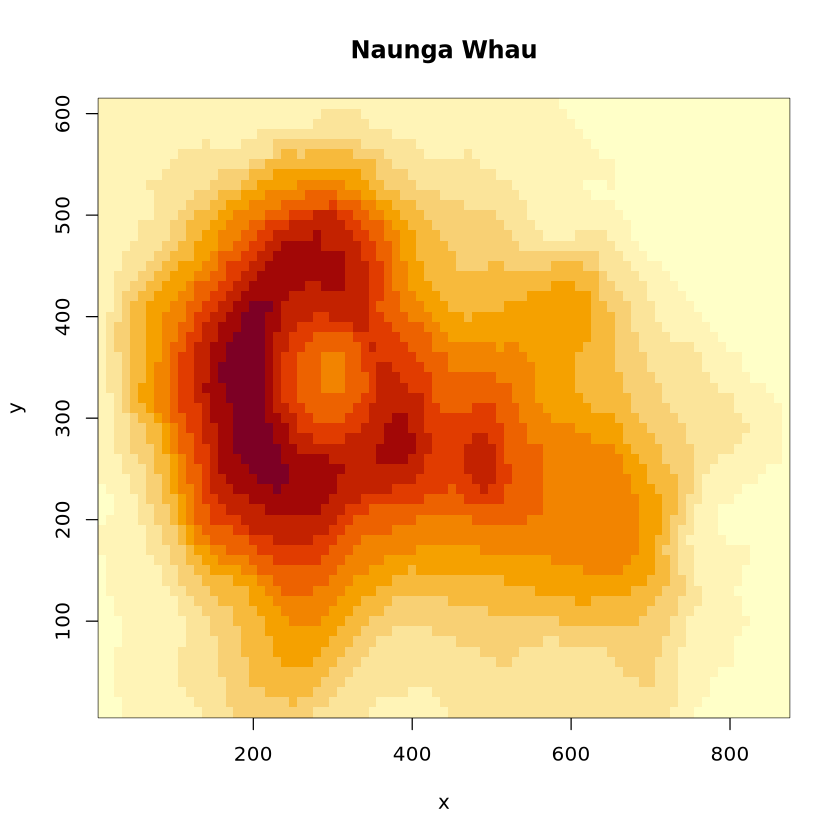

In [6]:
image(x, y, volcano, main = "Naunga Whau")  ## 이미지 그래프

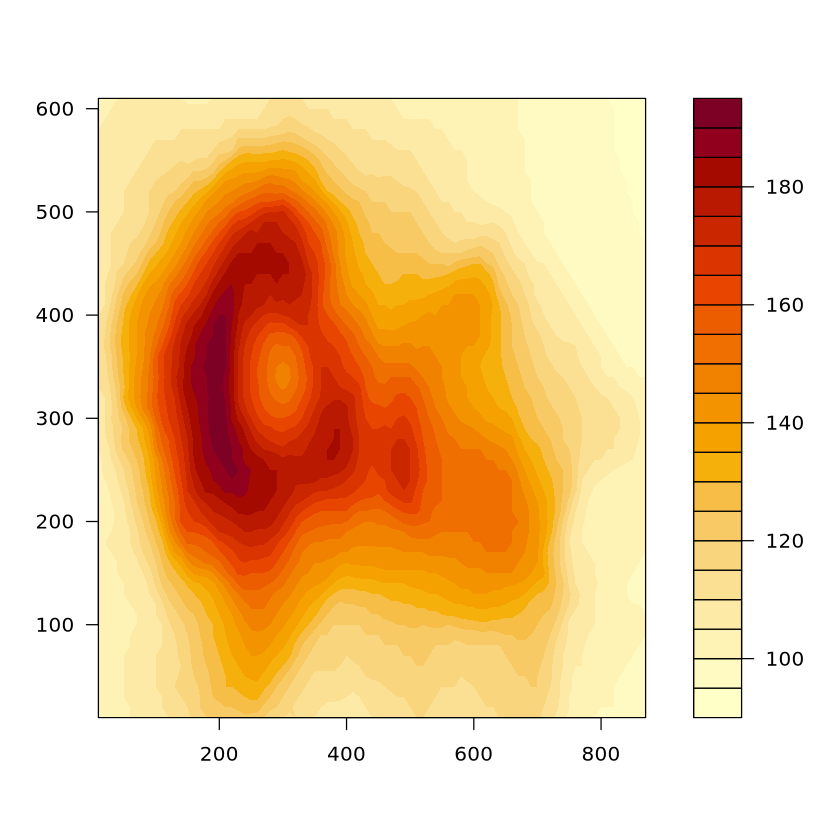

In [8]:
filled.contour(x, y, volcano, main = "Naunga Whau")  ## 컬러 등고선도

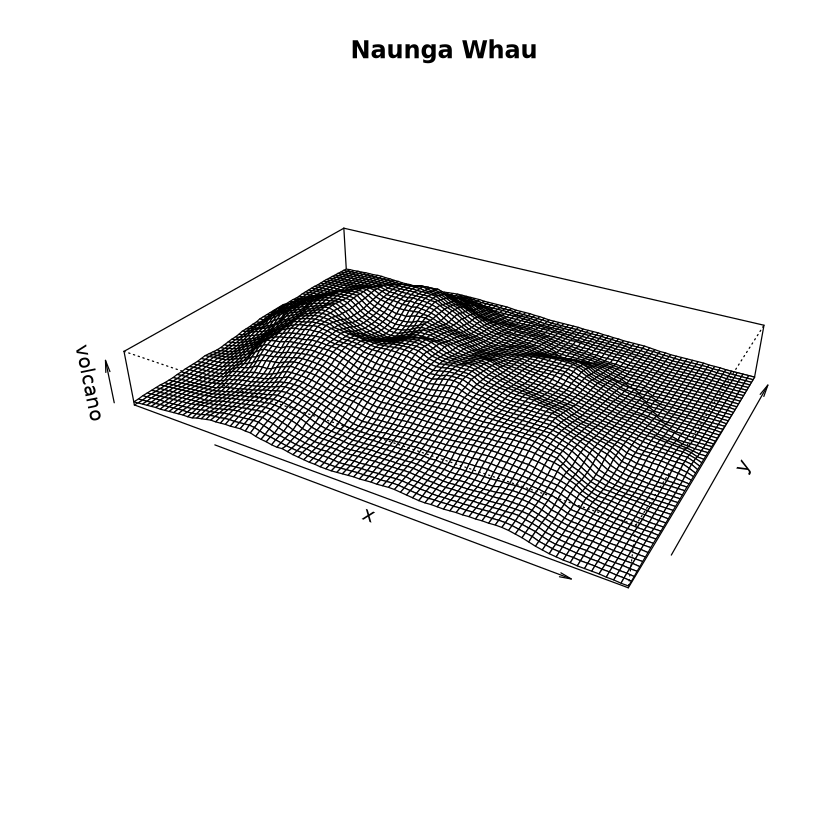

In [10]:
persp(x, y, volcano, phi = 30, theta = 30, scale = F, main = "Naunga Whau")  ## 전망도

### 군집화

유사도에 근거하여 개체들(또는 변수들)을 묶는 방법

`-` 개체 군집화(일반적으로 변수보다 개체를 군집화함.)

p차원 공간 상에서 개체 간의 (유클리드)거리를 측정

n개의 개체와 p개의 변수

* $p$개의 변수들은 먼저 표준화가 되어야 한다.(각 변수별로)

$$x_{ij}^* = \frac{x_{ij} - mean(X_j)}{sd(X_j)}, ~ i = 1, 2, \cdots, n$$

> 개체 표준화(정규분포로)

$$x_{ij}^* = \frac{x_{ij} - min(X_j)}{max(X_j), min(X_j)}, ~ i = 1, 2, \cdots, n$$

> 변수 표준화($[0,1]$값으로)

`-` k-평균 군집화

n개의 개체들을 k개의 군집으로

(알고리즘)

    (1) n개의 개체에서 k개를 랜덤으로 추출하여 초기 중심점으로 활용.
    
    (2) 모든 개체들을 가장 가까운 그룹 중심을 찾아 그룹에 소속시킴
    
    (3) 그룹 평균을 다시 계산
    
    (4) 모든 그룹에 대하여 새 중심이 이전의 중심과 차이가 없으면 멈추고, 아니면 (2)로 돌아가 반복.

> 대충 아무데나 찍고, 나머지는 가장 가까운 걸로 분류시키고 평균을 구함. 평균이 달라졌다? 그럼 그 평균들을 기준으로 다시 가장 가까운 걸로 분류시키고 평균을 구함. 평균이 달라졌다? 그럼 $\cdots$ 평균을 구함. 평균이 이전과 똑같다? 군집화 끝.

손으론 못해, 이걸 어케함. 컴퓨터가 하겠지.

몇 개로 클러스팅을 하는지도 판단하기 어려움.

In [11]:
library(MASS)
data(Boston)
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

cluster number
  1   2   3   4 
152  34 234  86 

,crim,nox,rm,age,dis,lstat
1,0.86,1.07,-0.50,0.80,-0.85,0.95
2,-0.20,0.38,0.28,0.37,-0.40,-0.16
3,-0.38,-0.33,0.06,-0.06,0.06,-0.26
4,-0.41,-1.14,0.62,-1.38,1.50,-0.90


cluster number
  1   2   3   4 
 84  34 152 236 

,crim,nox,rm,age,dis,lstat
1,-0.41,-1.14,0.63,-1.37,1.51,-0.90
2,-0.20,0.38,0.28,0.37,-0.40,-0.16
3,0.86,1.07,-0.50,0.80,-0.85,0.95
4,-0.38,-0.34,0.06,-0.08,0.06,-0.26


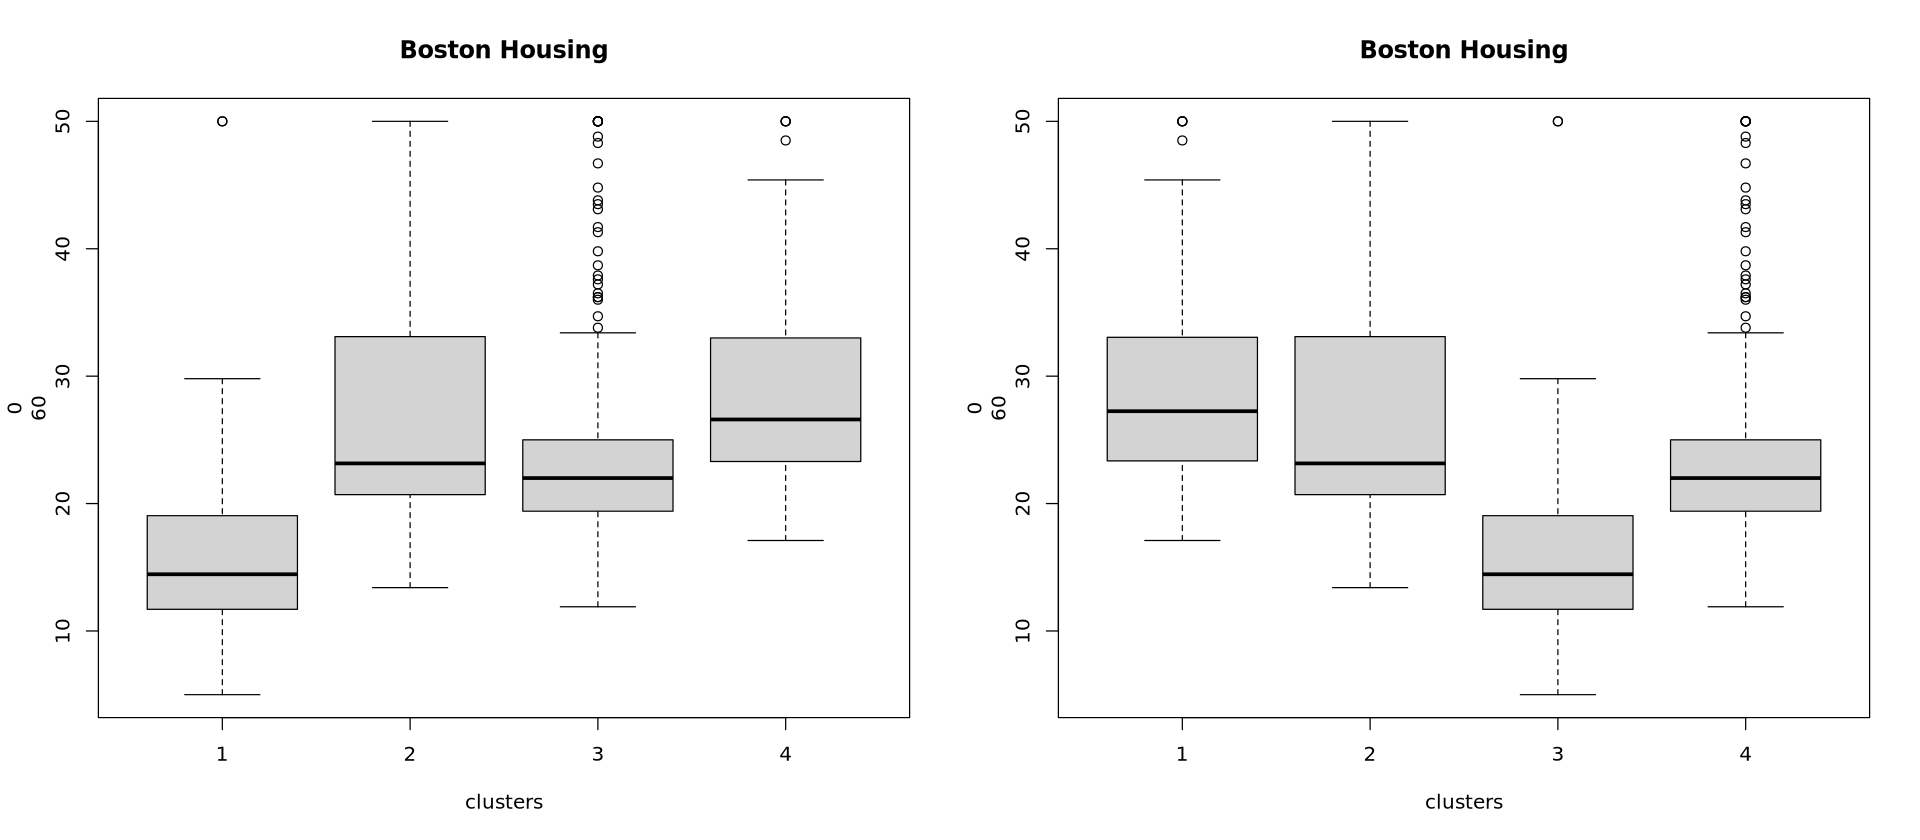

In [88]:
z_Boston = scale(Boston[, -14])  ## 개체 표준화
clusters = kmeans(z_Boston, 4, nstart = 300)  ## k 평균 군집화 300번 반복

table(clusters$cluster, dnn = "cluster number")
round(clusters$centers[, c(1,5,6,7,8,13)], 2)

options(repr.plot.width = 16)
par(mfrow = c(1, 2))
boxplot(Boston$medv ~ clusters$cluster, main = "Boston Housing", xlab = "clusters", ylab = c(0, 60))

z_Boston = scale(Boston[, -14])  ## 개체 표준화
clusters = kmeans(z_Boston, 4, nstart = 300)  ## k 평균 군집화

table(clusters$cluster, dnn = "cluster number")
round(clusters$centers[, c(1,5,6,7,8,13)], 2)
boxplot(Boston$medv ~ clusters$cluster, main = "Boston Housing", xlab = "clusters", ylab = c(0, 60))

In [65]:
clusters$totss  ## 군집 총제곱합
clusters$tot.withinss  ## 그룹 내 제곱합

[1] 6565

[1] 3127.089

> 위 두 값이 작으면 군집화 잘 됨

`-` 변수 군집화

완전연결 군집화

    (1) p개의 변수는 각각 하나의 군집으로 설정
    (2) 군집간 거리 중 가장 작은 군집 병합하여 H 표기
    (3) 기존 군집 G와 새 군집 H간 거리 계산
    (4) 군집 수가 하나가 되면 작업 종료

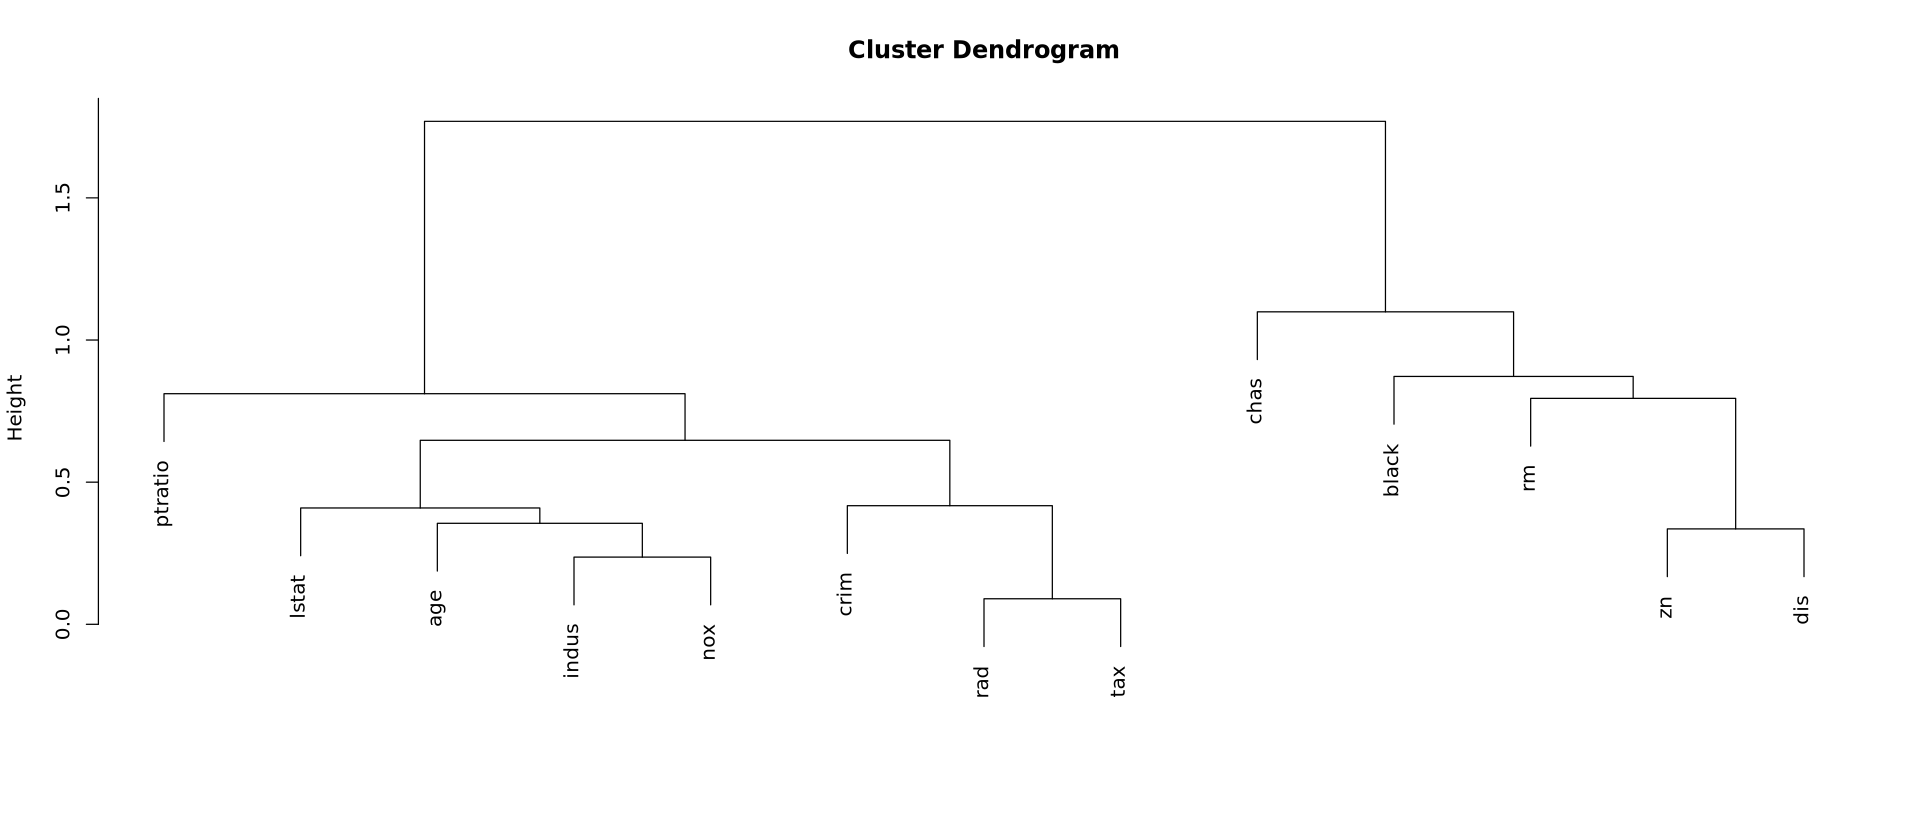

In [93]:
R = cor(Boston[, -14])
p = nrow(R)
D = as.dist(matrix(1, p, p) - R)
var_cluster = hclust(D, method = "complete")
plot(var_cluster, xlab = "", sub = "")

In [98]:
1 - R

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
crim,0.0000000,1.2004692,0.5934166,1.0558916,0.5790283,1.2192467,0.6472657,1.3796701,0.37449485,0.41723569,0.7100544,1.3850639,0.5443785
zn,1.2004692,0.0000000,1.5338282,1.0426967,1.5166037,0.6880094,1.5695373,0.3355918,1.31194783,1.31456332,1.3916785,0.8244797,1.4129946
indus,0.5934166,1.5338282,0.0000000,0.9370620,0.2363486,1.3916759,0.3552215,1.7080270,0.40487073,0.27923982,0.6167524,1.3569765,0.3962003
chas,1.0558916,1.0426967,0.9370620,0.0000000,0.9087972,0.9087488,0.9134822,1.0991758,1.00736824,1.03558652,1.1215152,0.9512115,1.0539293
nox,0.5790283,1.5166037,0.2363486,0.9087972,0.0000000,1.3021882,0.2685299,1.7692301,0.38855944,0.33197680,0.8110673,1.3800506,0.4091211
rm,1.2192467,0.6880094,1.3916759,0.9087488,1.3021882,0.0000000,1.2402649,0.7947538,1.20984667,1.29204783,1.3555015,0.8719314,1.6138083
age,0.6472657,1.5695373,0.3552215,0.9134822,0.2685299,1.2402649,0.0000000,1.7478805,0.54397755,0.49354441,0.7384850,1.2735340,0.3976615
dis,1.3796701,0.3355918,1.7080270,1.0991758,1.7692301,0.7947538,1.7478805,0.0000000,1.49458793,1.53443158,1.2324705,0.7084883,1.4969958
rad,0.3744949,1.3119478,0.4048707,1.0073682,0.3885594,1.2098467,0.5439775,1.4945879,0.00000000,0.08977181,0.5352588,1.4444128,0.5113237
tax,0.4172357,1.3145633,0.2792398,1.0355865,0.3319768,1.2920478,0.4935444,1.5344316,0.08977181,0.00000000,0.5391470,1.4418080,0.4560066


In [102]:
as.dist(1-R)

              crim         zn      indus       chas        nox         rm
zn      1.20046922                                                       
indus   0.59341659 1.53382819                                            
chas    1.05589158 1.04269672 0.93706197                                 
nox     0.57902829 1.51660371 0.23634855 0.90879719                      
rm      1.21924670 0.68800941 1.39167585 0.90874877 1.30218819           
age     0.64726575 1.56953734 0.35522149 0.91348223 0.26852990 1.24026493
dis     1.37967009 0.33559178 1.70802699 1.09917578 1.76923011 0.79475379
rad     0.37449485 1.31194783 0.40487073 1.00736824 0.38855944 1.20984667
tax     0.41723569 1.31456332 0.27923982 1.03558652 0.33197680 1.29204783
ptratio 0.71005442 1.39167855 0.61675244 1.12151517 0.81106732 1.35550149
black   1.38506394 0.82447968 1.35697654 0.95121152 1.38005064 0.87193136
lstat   0.54437852 1.41299457 0.39620028 1.05392930 0.40912108 1.61380827
               age        dis        r

crim   indus     nox     age     rad     tax ptratio   lstat      zn      rm 
      1       1       1       1       1       1       1       1       2       2 
    dis   black    chas 
      2       2       3

crim   indus     nox     age     rad     tax ptratio   lstat      zn      rm 
      1       1       1       1       1       1       1       1       2       2 
    dis   black    chas 
      2       2       3

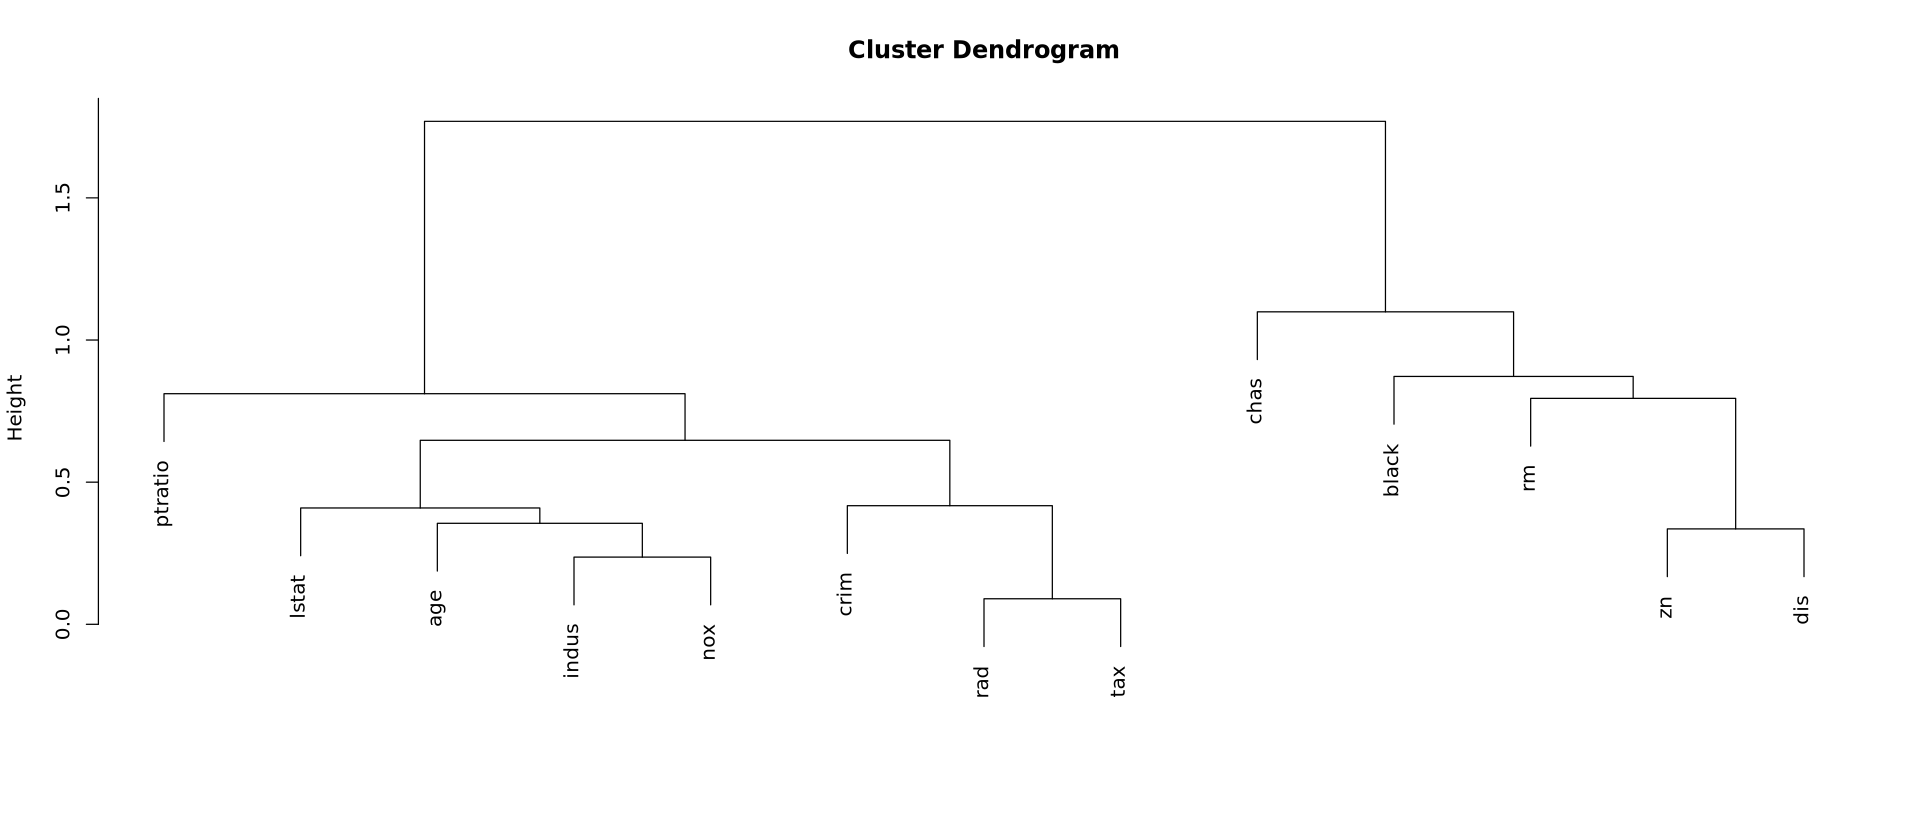

In [94]:
R<-cor(Boston[,-14]) #변수들간 상관행렬
p<-nrow(R) # 열의 수
D<-as.dist(matrix(1,p,p)-R) #거리행렬, as.dist(1-R)
var.cluster<-hclust(D, method="complete")  ## 완전 연결
plot(var.cluster, xlab="",sub="")
cluster <- cutree(var.cluster,h=1) # 높이 h를 지정하여 군집화
sort(cluster)
cluster1 <- cutree(var.cluster, k=3) # 군집 수 k를 지정 군집화
sort(cluster1)

506개의 개체, 13개의 변수.

변수 군집화 : 3개의 군집. $\to$ 각 군집의 차원을 축소하기 위해 주성분분석 실시.

`-` 군집화 결과의 시각화

    (1) p개 변수들을 군집화하여 l개의 그룹 생성
    (2) 주성분 분석과 `biplot`을 활용하여 변수 군집별로 소속 변수들만으로 n개 개체들을 시각화. 이때 군집화로 얻어진 개체들의 k개 그룹을 컬러화.